In [2]:
import pandas as pd
df = pd.read_parquet('../dist/hpct.parquet')

In [3]:
quarter = [
    ['2022-01', '2022-02', '2022-03'],
    ['2022-04', '2022-05', '2022-06'],
    ['2022-07', '2022-08', '2022-09'],
    ['2022-10', '2022-11', '2022-12'],
]
masks = [
    [
        df['date'].apply(lambda d: m in d)
        for m in q
    ]
    for q in quarter
]

In [4]:
df_q1 = pd.concat([
    df[masks[0][0]]['topics'],
    df[masks[0][1]]['topics'],
    df[masks[0][2]]['topics'],
])
df_q2 = pd.concat([
    df[masks[1][0]]['topics'],
    df[masks[1][1]]['topics'],
    df[masks[1][2]]['topics'],
])
df_q3 = pd.concat([
    df[masks[2][0]]['topics'],
    df[masks[2][1]]['topics'],
    df[masks[2][2]]['topics'],
])
df_q4 = pd.concat([
    df[masks[3][0]]['topics'],
    df[masks[3][1]]['topics'],
    df[masks[3][2]]['topics'],
])

In [5]:
q1_mean = {}
q2_mean = {}
q3_mean = {}
q4_mean = {}

def calculate_mean(t, qn_mean):
    for tnp in t:
        tn, tp = tnp
        tn = int(tn)
        if tn in qn_mean:
            _, t_sum, ti = qn_mean[tn]
            t_sum = t_sum + tp
            ti = ti + 1
            qn_mean[tn] = (t_sum / ti, t_sum, ti)
        else:
            qn_mean[tn] = (tp, tp, 1)
def calculate_q1(t):
    calculate_mean(t, q1_mean)
def calculate_q2(t):
    calculate_mean(t, q2_mean)
def calculate_q3(t):
    calculate_mean(t, q3_mean)
def calculate_q4(t):
    calculate_mean(t, q4_mean)


In [6]:
df_q1.apply(calculate_q1)
df_q2.apply(calculate_q2)
df_q3.apply(calculate_q3)
df_q4.apply(calculate_q4)

85553      None
85554      None
85555      None
85556      None
85557      None
           ... 
1198330    None
1198331    None
1198332    None
1198333    None
1198334    None
Name: topics, Length: 307541, dtype: object

In [7]:
df_quarterly_topics = {}

def port_to_df(qn_mean):
    for n in qn_mean:
        if n in df_quarterly_topics:
            df_quarterly_topics[n].append(qn_mean[n][0])
        else:
            df_quarterly_topics[n] = [qn_mean[n][0]]

port_to_df(q1_mean)
port_to_df(q2_mean)
port_to_df(q3_mean)
port_to_df(q4_mean)

df_quarterly_topics = pd.DataFrame(df_quarterly_topics)

In [8]:
df_quarterly_topics

,5,0,9,3,7,8,1,6,2,4
0,0.499942,0.520044,0.484688,0.419374,0.358038,0.427298,0.400537,0.400523,0.463240,0.506180
1,0.481069,0.509801,0.499502,0.418377,0.351957,0.387582,0.398454,0.402590,0.450854,0.487228
2,0.408084,0.499135,0.489279,0.437742,0.373294,0.442475,0.398532,0.391604,0.454835,0.502248
3,0.431068,0.502157,0.520649,0.423212,0.364015,0.424856,0.393714,0.409645,0.437726,0.518346


In [ ]:
df_quarterly_topics.to_csv('../dist/quarterly_topics.csv')

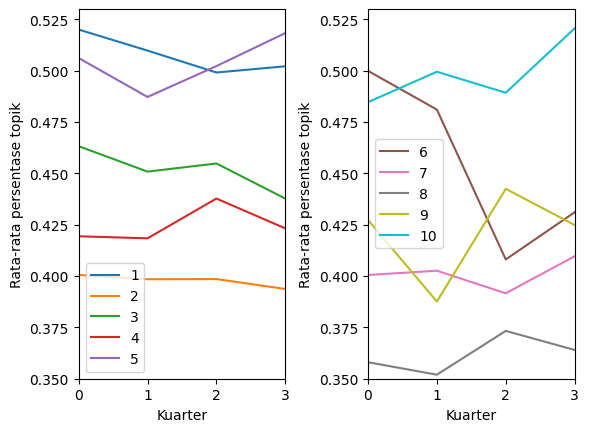

In [81]:
import matplotlib.pyplot as plt

figs, (ax1, ax2) = plt.subplots(1, 2)

colors = [
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'tab:cyan',
]

for i in range(5):
    ax1.plot(df_quarterly_topics[i], label=f'{i+1}')
for i in range(5, 10):
    ax2.plot(df_quarterly_topics[i],
             f'{colors[i-5]}', label=f'{i+1}')

ax1.set(xlabel='Kuarter', ylabel='Rata-rata persentase topik')
ax2.set(xlabel='Kuarter', ylabel='Rata-rata persentase topik')

ax1.legend()
ax1.axis([0, 3, 0.35, 0.53])
ax2.legend()
ax2.axis([0, 3, 0.35, 0.53])

plt.subplots_adjust(wspace=0.4)
plt.show()

figs.savefig('../dist/quarterly_topics.svg')
